<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/logo_oficial_inpe_2025.png" align="left" style="height: 105px" height="105"/>
<!-- https://www.gov.br/mcti/pt-br/composicao/rede-mcti/instituto-nacional-de-pesquisas-espaciais -->
<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/harmonize_logo_without_white_background.png" align="right" style="height: 90px" height="90"/>

<h1 style="color:#274ad4; text-align: center">Cube4health</h1>
<h3 style="color:#274ad4; text-align: center">Drone data processing</h3>
<hr style="border:2px solid #274ad4;">
<br/>

<div style="text-align: center;font-size: 90%;">
     <a href="https://nbviewer.jupyter.org/github/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Harmonize-Annual-Meeting/cube4health_drone_data_processing.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" ></a>
    <br/><br/>
    Marcos L. Rodrigues<sup><a href="https://orcid.org/0000-0002-9199-6928" target="_blank" rel="noopener noreferrer"><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16"alt="ORCID iD" style="vertical-align: text-bottom;"/></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:marcos.rodrigues@inpe.br">marcos.rodrigues@inpe.br</a>
    <br/><br/>
    Last Update: November 7, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook presents an overview of the <b>E</b>ODCtHRS <b>D</b>rone <b>D</b>ata <b>PR</b>ocessing (EDDPR) subpackage within the cube4health framework, designed to facilitate the processing, analysis, and publication of drone-acquired data. The module provides a set of reproducible workflows for transforming raw drone imagery into standardized data products (Cloud Optimized GeoTIFF – COG files), supporting both research and operational health-related applications. Emphasis is placed on the integration of EDDPR with existing geospatial and cloud-based resources provided by <a href="https://data.inpe.br/bdc/en/home-page-2/">the BDC project</a>, ensuring scalability and interoperability. The deployment and publication processes described herein assume the availability of the necessary computational and data management infrastructure (<a href="https://harmonize-brazil.github.io/cube4health/index.html">see documentation</a>). This work aims to streamline drone data workflows, enabling efficient use of high-resolution environmental and health-related information in scientific and decision-making contexts.
</div
</div>

<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/cube4health_logo.png" align="right" width="80"/>

# Introduction
<hr style="border:1px solid #274ad4;">


The image collections and data cubes in the BDC project context are distributed as Cloud Optimized GeoTIFF (COG) files, with an internal organization that enables efficient data access in distributed and high-performance cloud environments [(*FERREIRA et al., 2020*)](#FERREIRA2020). This is possible because COG files not only store the raw pixels of the image but also organize those pixels into tiles (blocks of images) and overviews (lower-resolution versions of the original image) [(*ZAGLIA et al., 2019*)](#ZAGLIA2019). This organization allows the use of HTTP GET requests to retrieve only the portions of a file that are needed, instead of downloading the entire file.


## Drone image processing to integrate into STAC

The process of converting raw drone imagery into the Cloud Optimized GeoTIFF (COG) format presents a significant challenge, as the information contained in the EXIF metadata — specifically the latitude and longitude of the aircraft’s position at the moment each photo was captured — is insufficient to accurately project the images onto Earth’s surface. To achieve proper georeferencing, it is necessary to translate these positional coordinates into image corner coordinates, taking into account the drone’s rotational parameter (course angle) and flight altitude as auxiliary information.

We achieved accurate image projection by employing a spatial reference system that ensures precise alignment of each scene with its corresponding ground location. The adopted method involves estimating north-up image coordinates and applying an affine rotation transformation based on the course angle.

| <img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/Drone/drone_projection_Paper.png"/> | 
|:--:| 
| **Figure 1** - Approach used for the spatial projection of drone images. |


Figure 2 presents a flowchart summarizing the main steps involved in processing raw drone images to generate data assets (COG files) and metadata for visualization and analysis via a STAC service. This workflow served as the foundation for the development of the EDDPR module.

| <img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/Drone/ArquiteturaDroneV3.png" width="800px"/> | 
|:--:| 
| **Figure 2** - The architecture of the drone data integration and dissemination. |


The processing of drone data follows the HARMONIZE protocol (<a href="https://docs.google.com/document/d/1pZ_yBBRXJBnyq6wTk4bMXDYmdHe-aP1BHejxg4-wc4U/edit?usp=sharing">see documentation</a>), which defines the standards for organizing and providing drone imagery and auxiliary information collected during fieldwork campaigns. The creation of image or mosaic collections relies on template files in JSON format, specific to each device (e.g., Phantom 3 Advanced, Mavic 3M, Mavic 3 Enterprise), data type (scene, mosaic, or thermal), and flight altitude.


### Summary of Processes Involved in the EDDPR Module

The EDDPR module comprises a set of processes designed to prepare, correct, and publish drone-derived data products. The main steps are summarized below:

* Earth surface projection of drone images [(*MACIEL et al., 2023*)](#MACIEL2023):
The raw drone images are projected onto Earth’s surface using geospatial reference data.  
| <img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/Drone/EDDPR_projection.png"/> | 
|:--:| 
| **Figure 3** - Illustration of a scene projection captured in Cametá municipality: the left image shows the raw, counterclockwise-rotated photo relative to Earth’s surface, while the right image presents the projected result in the EPSG:3395 Coordinate Reference System, rotated by 90° according to the course angle. |

* Correction and Alignment (Registration) of Multispectral Data [(*RODRIGUES et al., 2025*)](#RODRIGUES2025):
Multispectral drone images are spatially aligned using the Enhanced Correlation Coefficient (ECC) Maximization method.
| <img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/Drone/EDDPR_MS_register.png"/> | 
|:--:| 
| **Figure 4** - Illustration of multispectral drone data alignment using the ECC Maximization approach. |

* Spectral Index Calculation (NDVI):
The Normalized Difference Vegetation Index (NDVI) is computed from the aligned multispectral bands to assess vegetation health and density.

* Mosaic Conversion from GeoTIFF to COG:
The processed image mosaics are converted from GeoTIFF to COG format, enabling efficient cloud-based storage and access.

* Data Publishing to STAC Catalog and GeoServer:
The final COG assets and associated metadata are published to the BDC-STAC catalog and GeoServer, allowing data visualization and analysis within the HARMONIZE Explore.

# EDDPR Processing
<hr style="border:1px solid #274ad4;">

In cube4health, each type of data has your specific module (subpackage) for processing and publishing. Try (``eddpr`` - drone) to see parameter requirements:

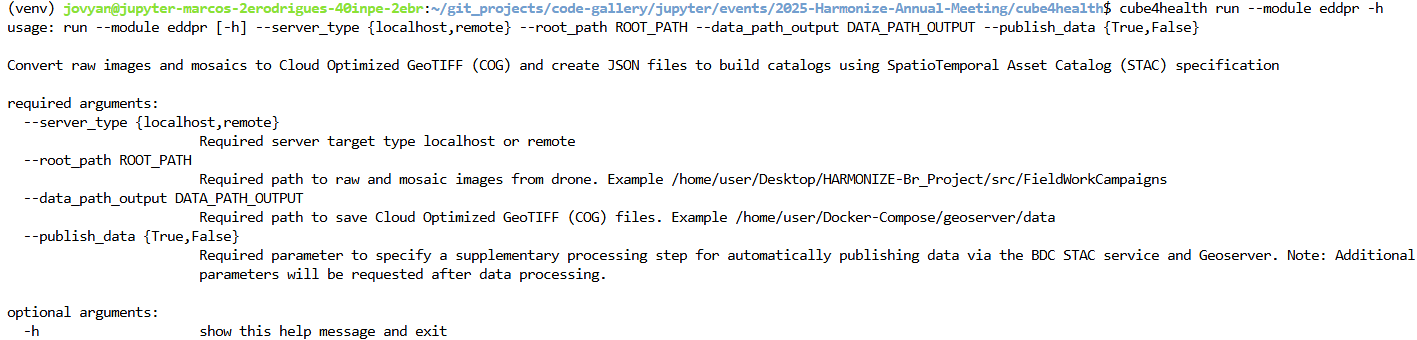

    

This is an example of using the ``eddpr`` module to process and publish data at localhost:

    cube4health run --module eddpr  --server_type localhost --root_path /home/user/Desktop/HARMONIZE-Br_Project/src/FieldWorkCampaigns --data_path_output /home/user/Docker-Compose/geoserver/data  --publish_data True

**Obs.:** As previously noted, the processing of drone data relies on a <a href="https://docs.google.com/document/d/1pZ_yBBRXJBnyq6wTk4bMXDYmdHe-aP1BHejxg4-wc4U/edit?usp=sharing">protocol</a> that defines both data organization and the generation of auxiliary JSON files.

# Hands-on with EDDPR
<hr style="border:1px solid #274ad4;">


After installing the cube4health package (<a href="https://github.com/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Harmonize-Annual-Meeting/cube4health_introduction.ipynb">see this tutorial</a>), we will begin a practical activity using a dataset acquired with the Mavic 3M drone in Santa Luzia – Mocajuba, PA (Lower Tocantins).
If you prefer, you can use your own dataset—just follow the protocol defined in the documentation.

Download the sample dataset selected for this training:

In [3]:
!wget https://geolab.inpe.br/big/nextcloud/index.php/s/PZGpWdsZGyAZk3i/download/drone_data_harmonize_annual_meeting2025.zip

Extract folder with drone data:

In [ ]:
!unzip drone_data_harmonize_annual_meeting2025.zip

Now, we have all the structures necessary to process the data!

## References

<a id="FERREIRA2020"></a>
* *FERREIRA, K. R. et al.* Earth observation data cubes for Brazil: Requirements, methodology and products. Remote Sensing, 12(24), 2020. ISSN 2072-4292. doi: 10.3390/rs12244033. URL <a>https://www.mdpi.com/2072-4292/12/24/4033</a>.
  
<a id="MACIEL2023"></a>
* *MACIEL, A. M. et al.* The HARMONIZE Project and the EODCtHRS Architecture: An Earth Observation Data Cube tuned for Health Response Systems. XXIV Brazilian Symposium on Geoinformatics. Anais...São José dos Campos: 2023. URL <a>http://urlib.net/ibi/8JMKD3MGPDW34P/4ADBNKB</a>.

<a id="RODRIGUES2025"></a>
* *RODRIGUES, M. L. et al.* EXPERIMENTS FOR UNMANNED AERIAL VEHICLE MULTISPECTRAL IMAGE REGISTRATION. XXI Brazilian Symposium on Remote Sensing. Anais...Salvador: 2025. URL <a>https://proceedings.science/sbsr-2025/papers/experiments-for-unmanned-aerial-vehicle-multispectral-image-registration?lang=en<a/>.
  
<a id="ZAGLIA2019"></a>
* *ZAGLIA, M. C. et al.* Catalogação de Metadados do Cubo de Dados do Brasil com o SpatioTemporal Asset Catalog. XX Brazilian Symposium on Geoinformatics. Anais...São José dos Campos: 2019. URL <a>http://urlib.net/ibi/8JMKD3MGPDW34R/3UFEFD8?ibiurl.backgroundlanguage=pt-BR</a>.

